In [1]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
train_ids = pd.read_csv('train_semeval_parids-labels.csv')
test_ids = pd.read_csv('dev_semeval_parids-labels.csv')

train_ids = train_ids['par_id']
test_ids = test_ids['par_id']

Text(0, 0.5, 'count')

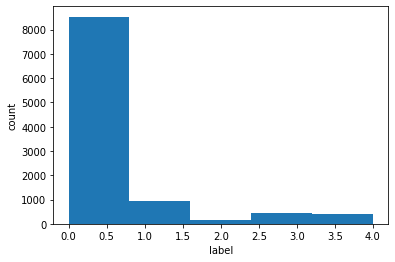

In [3]:
data = pd.read_csv('dontpatronizeme_pcl.tsv', sep='\t', header=None, names=['par_id', 'art_id', 'keyword', 'country_code', 'text', 'label'])

data.label.value_counts()
# plot the histogram for the discrete labels
plt.hist(data.label, bins=5)

plt.xlabel('label')
plt.ylabel('count')

In [4]:

# map labels to 0 and 1(Non-PCL and PCL)
data['label'] = data['label'].apply(lambda x: 0 if x == 0 or x == 1 else 1)

In [5]:
data = data.drop('art_id', axis=1)
data = data.drop('keyword', axis=1)
data = data.drop('country_code', axis=1)

train_data = data[data['par_id'].isin(train_ids)]
test_data = data[data['par_id'].isin(test_ids)]

train_data = train_data.drop('par_id', axis=1)
test_data = test_data.drop('par_id', axis=1)

# fill the missing values with empty string
train_data = train_data.fillna('')
test_data = test_data.fillna('')

# split the validation set from the training set
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

In [6]:
# save the data
train_data.to_csv('./datasets/train_data.csv', index=False)
val_data.to_csv('./datasets/val_data.csv', index=False)
test_data.to_csv('./datasets/test_data.csv', index=False)